## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 13 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 instances) and not fire (106 instances) classes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading and Cleaning the Dataset

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)


In [3]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
## Missing values
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
## Asssigning an indicator to new column Region to identify two sets of data - 0 for Bejaia Region Dataset which is till 122 rows , 1 - for Sidi-Bel Abbes Region Dataset which is from 122 rows
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1


In [6]:
## Drop Missing values present in the row index
df=df.drop(122).reset_index(drop=True)


In [7]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [8]:
df=df.drop(166).reset_index(drop=True)


In [9]:
df[df['day']=='day']
df=df.drop(122).reset_index(drop=True)


In [10]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [11]:
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [13]:
## Stripping the spaces in column names
df.columns=df.columns.str.strip()


### Converting the object datatypes into int & float

In [14]:
df


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [15]:
## method 1: Directly using the column names . Converting the data types into Int and float based on above data observations

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region' ]].astype(int)

## df[[ 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[[ 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [17]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [18]:
## Method 2: Using for loop . Convert the rest of columns into float except Classes .

object=[feature for feature in df.columns if df[feature].dtype=='O']


In [19]:
object


['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [20]:
for i in object:
  if i!='Classes':
    df[i]=df[i].astype(float)


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Exploratory Data Analysis

In [22]:
## remove unused columns
df_copy=df.drop(columns=['day','month','year'])


In [23]:
df_copy.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df_copy['Classes'].value_counts()


Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)


In [26]:
df_copy['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [27]:
df['Classes'].dtype


dtype('O')

In [28]:
df


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [29]:
df_copy.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Source Data Visualizations

In [30]:
data=df_copy


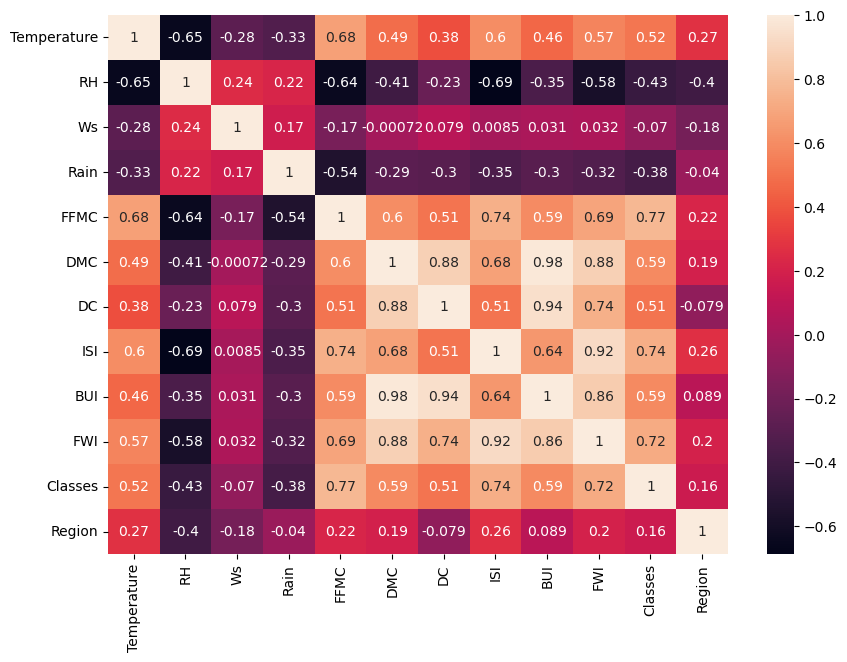

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()


In [32]:
## Pie Chart for target varaible
percentage=data['Classes'].value_counts(normalize=True)*100
percentage


Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

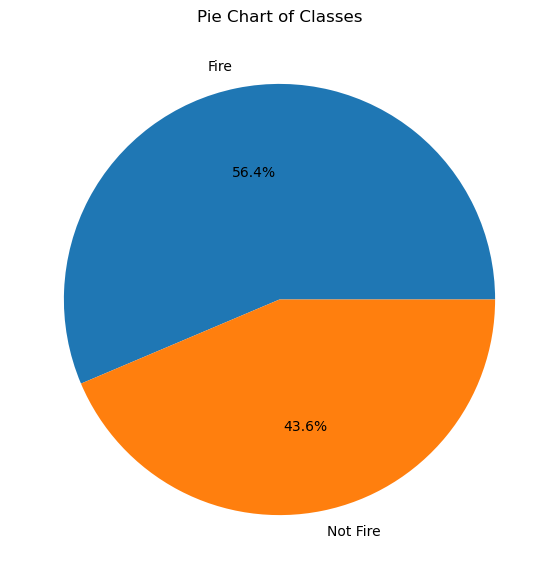

In [33]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()


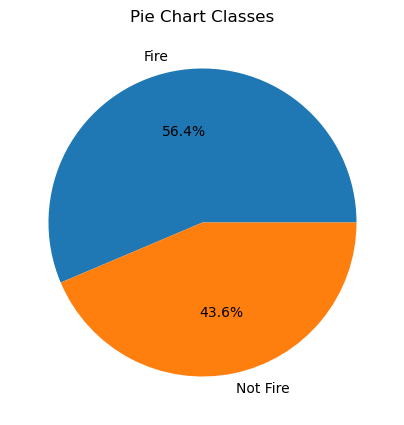

In [34]:
plt.figure(figsize=(5,5))
plt.pie(percentage,labels=['Fire','Not Fire'],autopct='%1.1f%%')
plt.title("Pie Chart Classes")
plt.show()


In [35]:
data.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


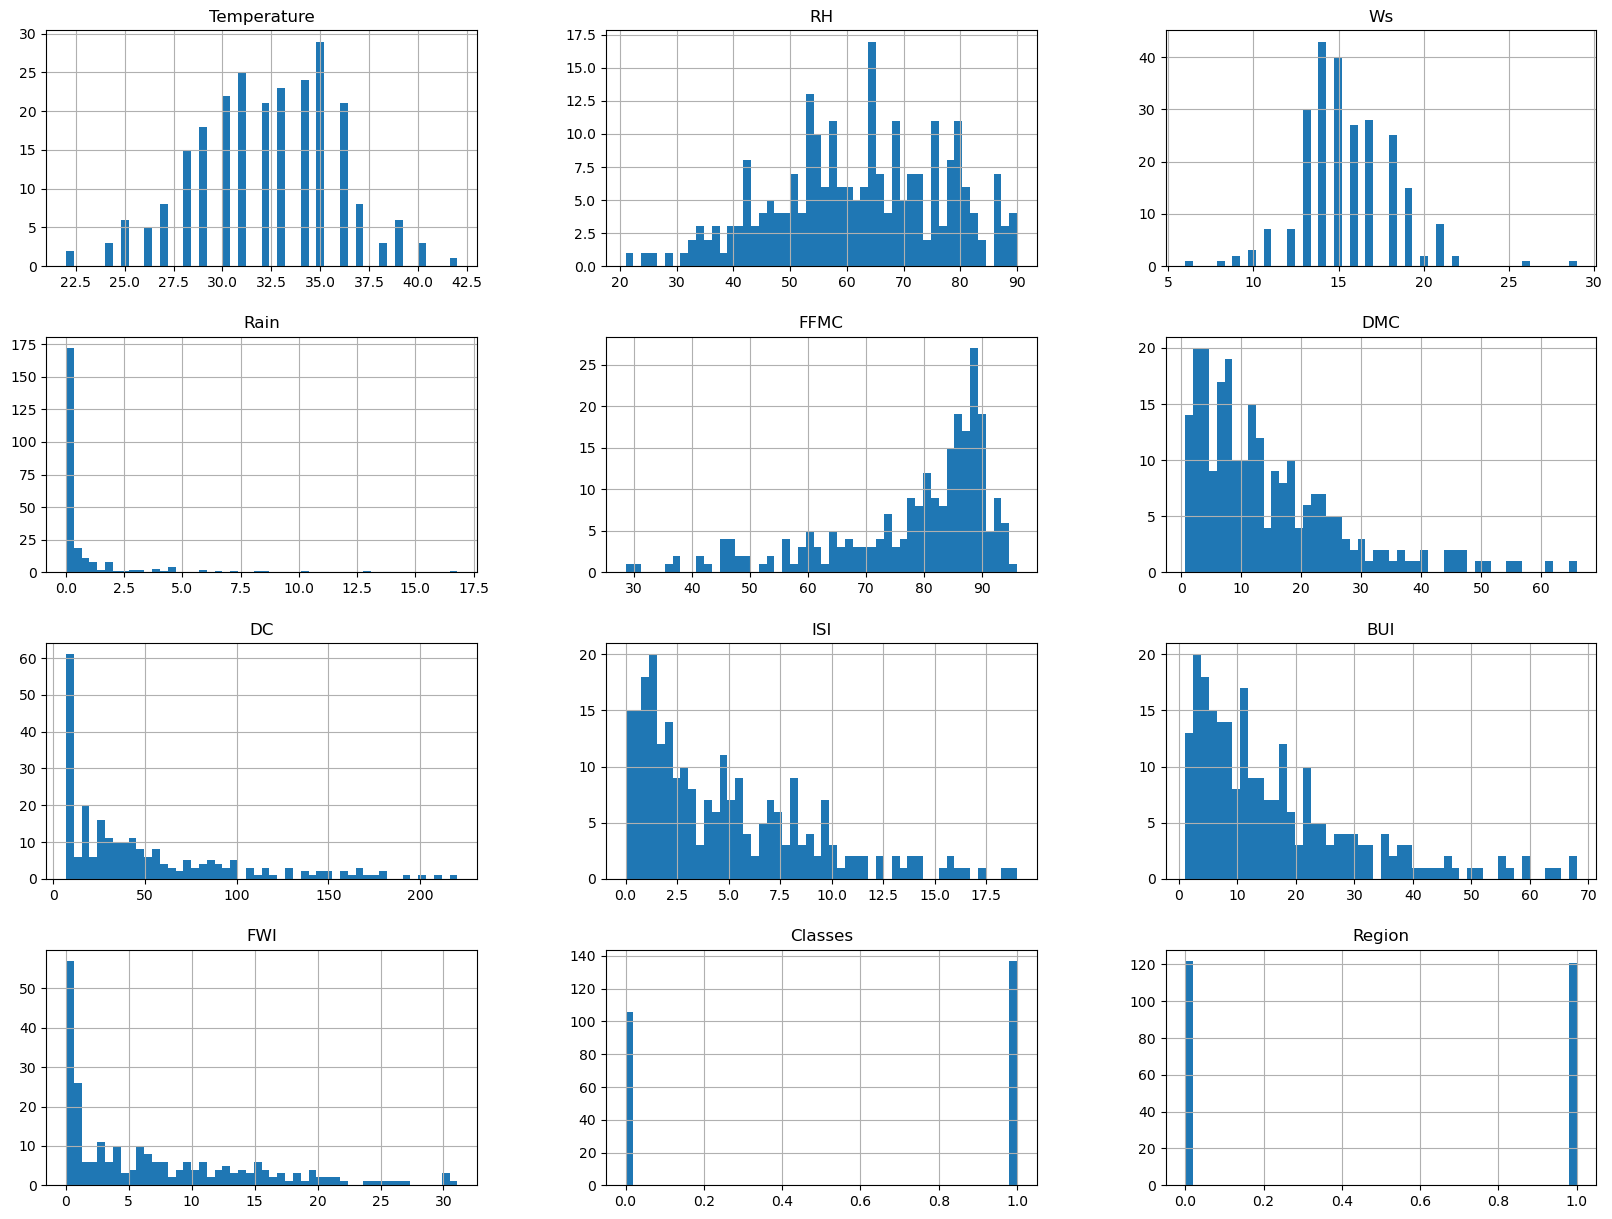

In [36]:
## Plot desnity plot for all features
data.hist(bins=50,figsize=(20,15))
plt.show()


In [37]:
sns.displot(data['Temperature'],kind='hist')


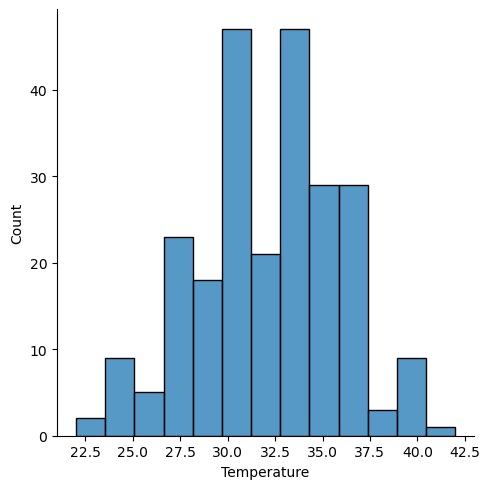

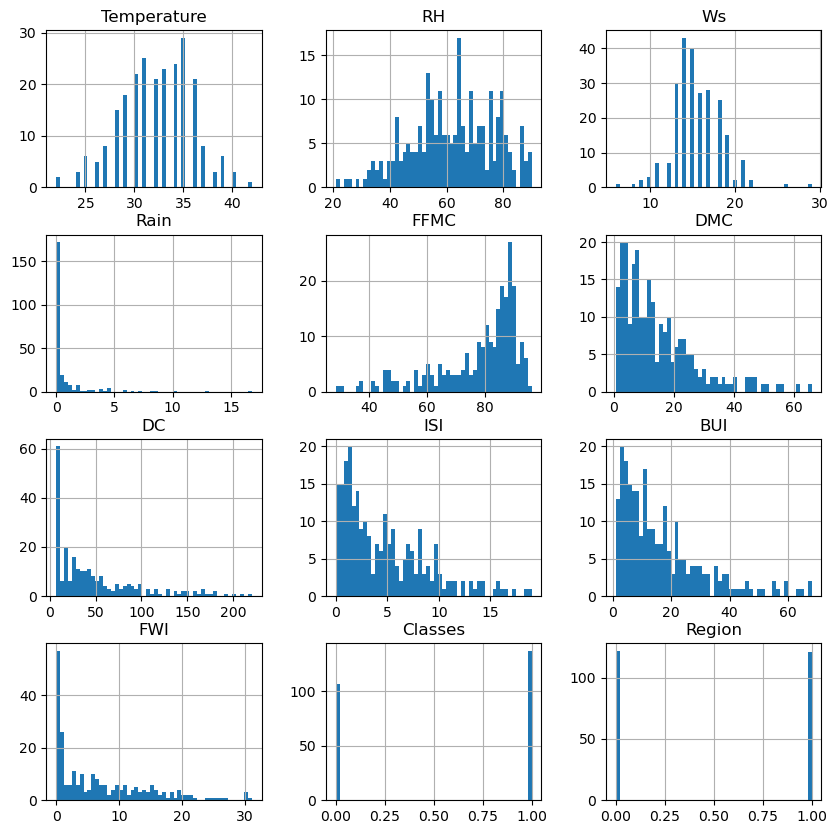

In [38]:
data.hist(bins=50,figsize=(10,10))
plt.show()


In [39]:
## Box plots
sns.boxplot(data)


<Axes: >

In [40]:
data.describe()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [41]:
data


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [42]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [43]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)


In [44]:
df['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [45]:
## Lets plot the fire against each month

plt.bar(df['day'],df['Classes'],color='green')


<BarContainer object of 243 artists>

In [46]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')


Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

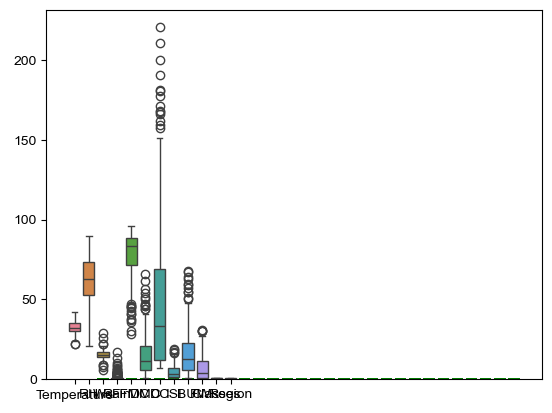

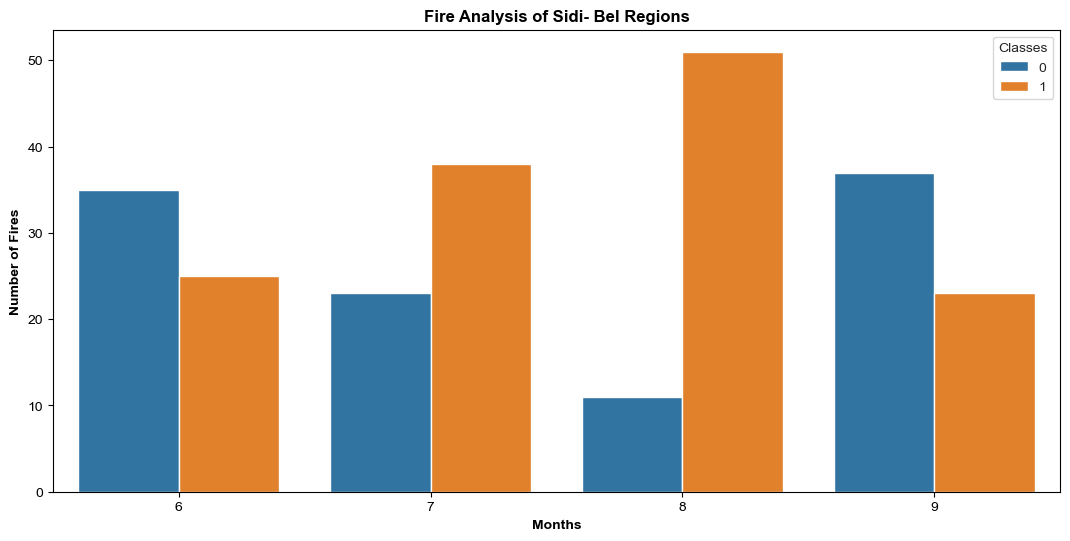

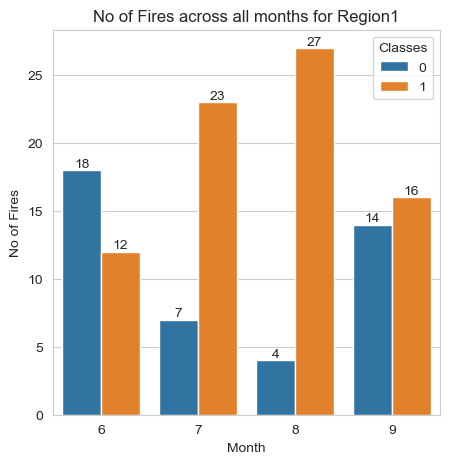

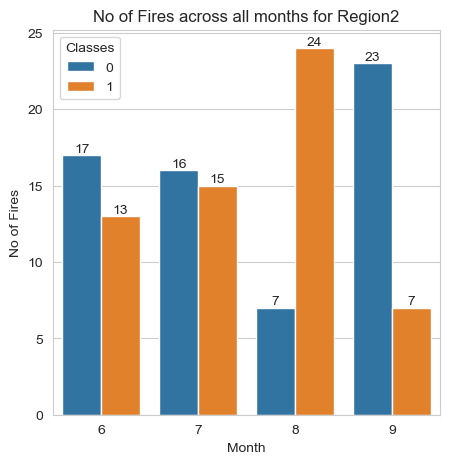

In [47]:
df_Region1=df[df['Region']==1]
plt.subplots(figsize=(5,5))
ax=sns.countplot(data=df_Region1, x="month" ,hue='Classes')
plt.xlabel("Month")
plt.ylabel("No of Fires")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title("No of Fires across all months for Region1")

df_Region2=df[df['Region']==0]
plt.subplots(figsize=(5,5))
ax=sns.countplot(data=df_Region2, x="month" ,hue='Classes')
plt.xlabel("Month")
plt.ylabel("No of Fires")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title("No of Fires across all months for Region2")

plt.show()


## Feature Scaling

In [48]:
data.head()
X=data.drop('FWI',axis=1)
y=data['FWI']


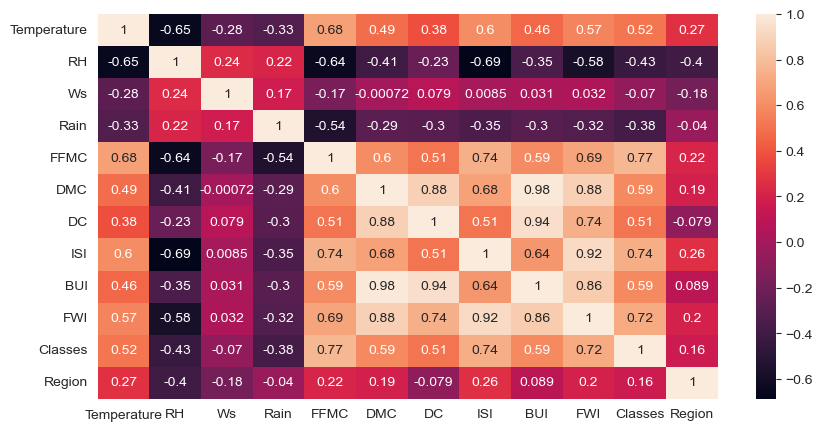

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()


In [50]:
## Multi collinearity between features
def corr_threshold(data,threshold):
  pairs=[]
  corr_matrix=data.corr()
  cols=corr_matrix.columns

  for i in range(len(cols)):
    for j in range(i):
      corr=corr_matrix.iloc[i,j]
      if abs(corr)>=threshold:
        if cols[i]!=cols[j]:
          pairs.append((cols[i],cols[j],corr))

  return pairs


In [51]:
column=corr_threshold(data,0.8)
column


[('DC', 'DMC', np.float64(0.8759246606759622)),
 ('BUI', 'DMC', np.float64(0.9822484890812936)),
 ('BUI', 'DC', np.float64(0.9419884631009655)),
 ('FWI', 'DMC', np.float64(0.8758641588191531)),
 ('FWI', 'ISI', np.float64(0.9228949343157855)),
 ('FWI', 'BUI', np.float64(0.8579730958964258))]

In [52]:
data.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [53]:
X=data.drop('FWI',axis=1)
y=data['FWI']
X,y


(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4        0       0
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9        0       0
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7        0       0
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7        0       0
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9        0       0
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...      ...     ...
 238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       1
 239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2        0       1
 240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4        0       1
 241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1        0       1
 242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8        0       1
 
 [243 rows x 11 columns],
 0      0.5
 1      0.4
 2      0.1


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [56]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


## Box Plots to understand the effects of Standard Scaler

In [57]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')


Text(0.5, 1.0, 'X_train After Scaling')

## Model Training

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 0.46514565204621683
Mean Absolute Error :  0.4815221906623734
r2_score :  0.9890081239143884


## Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso_regressor=Lasso()
lasso_regressor.fit(X_train_scaled,y_train)
y_pred=lasso_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 1.9355128672848139
Mean Absolute Error :  1.0742832664683906
r2_score :  0.9379327422653061


## Cross Validation Lasso

In [60]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lassocv_regressor=LassoCV(cv=5)
lassocv_regressor.fit(X_train_scaled,y_train)
y_pred=lassocv_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 0.5373786344410172
Mean Absolute Error :  0.5113522875466269
r2_score :  0.9871200732666617


## Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge_regressor=Ridge()
ridge_regressor.fit(X_train_scaled,y_train)
y_pred=ridge_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 0.5598686895237591
Mean Absolute Error :  0.5164156257981333
r2_score :  0.9866995634213902


In [62]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridgecv_regressor=RidgeCV()
ridgecv_regressor.fit(X_train_scaled,y_train)
y_pred=ridgecv_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 0.5598686895240749
Mean Absolute Error :  0.5164156257983273
r2_score :  0.9866995634213677


In [63]:
ridgecv_regressor.get_params()


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elastic Net Regression

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Elasticnet_regressor=ElasticNet()
Elasticnet_regressor.fit(X_train_scaled,y_train)
y_pred=Elasticnet_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_pred,y_test)


Mean Squared Error : 4.3511037449609296
Mean Absolute Error :  1.66406248904767
r2_score :  0.8451575283881373


In [65]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Elasticnetcv_regressor=ElasticNetCV()
Elasticnetcv_regressor.fit(X_train_scaled,y_train)
y_pred=Elasticnetcv_regressor.predict(X_test_scaled)
print("Mean Squared Error :",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_pred,y_test))
print("r2_score : ",r2_score(y_pred,y_test))
plt.scatter(y_test,y_pred)


Mean Squared Error : 0.7462076133846994
Mean Absolute Error :  0.6183882578710894
r2_score :  0.981815365166002


#### From the above Ridge Regression has highest r2sore at 98.66% . Lets create a pickle file for app deployment & prediction using flask

In [66]:
## Create Pickle file - Pickle the preprocessing Model and ML Model (Ridge Model)

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_regressor,open('ridge_regressor.pkl','wb'))
